100.0%┣██████████████████████████████████████████┫ 1/1 [00:00<Inf:Inf, 0.0 it/s]
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.HiddenMarkovModel{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:185
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:185
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.HiddenMarkovModel{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:187
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:187


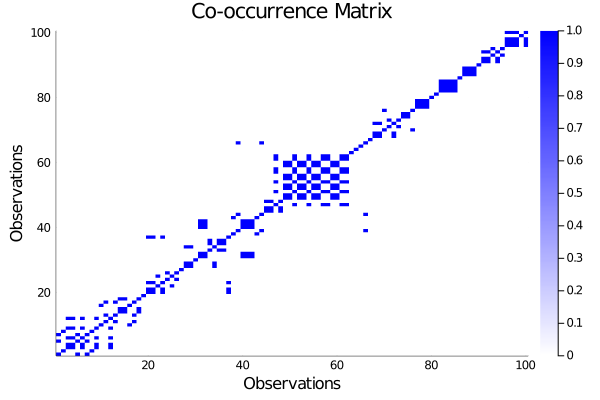

In [5]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)

data_covariance = Matrix{Float64}(0.1I, 2, 2)
prior_covariance = Matrix{Float64}(I, 2, 2)
prior_mean = Vector{Float64}(zeros(2))
data_parameters = Ntl.Models.GaussianParameters(data_covariance, prior_mean, prior_covariance)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

model = Ntl.Models.HiddenMarkovModel(ntl_cluster_parameters, data_parameters)
hmm_data = Ntl.Generate.generate(model, n=100)
data = Matrix(transpose(hmm_data[:, 2:end]))
true_clustering = hmm_data[:, 1]
Ntl.Plot.plot_assignments(true_clustering)
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

100.0%┣███████████████████████████████████████┫ 999/999 [00:14<00:00, 72.6 it/s]
100.0%┣███████████████████████████████████┫ 1000/1000 [00:00<00:00, 2217.3 it/s]


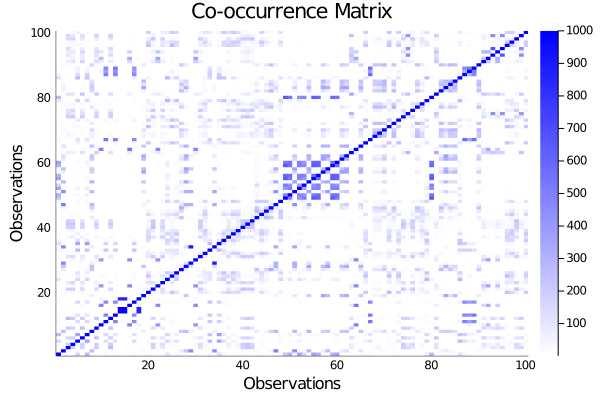

In [6]:
dp_arrivals = Ntl.Models.PitmanYorArrivals()
dp_parameters = Ntl.Models.BetaNtlParameters(0., dp_arrivals)
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000)
hmm_model = Ntl.Models.HiddenMarkovModel(dp_parameters, data_parameters)
markov_chain = Ntl.Fitter.fit(data, hmm_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(markov_chain)